In [1]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Load Iris Dataset

In [2]:
iris = load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
features = iris.data
feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names

# features = np.concatenate((features[:5], features[50:55], features[100:105]), axis=0)
# target = np.concatenate((target[:5], target[50:55], target[100:105]), axis=0)

print(features.shape)

df_feature = pd.DataFrame(features, columns=feature_names)
df_target = pd.DataFrame(target, columns=["target"])

df = pd.concat([df_feature, df_target], axis=1)

df

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Iris Dataset Figure

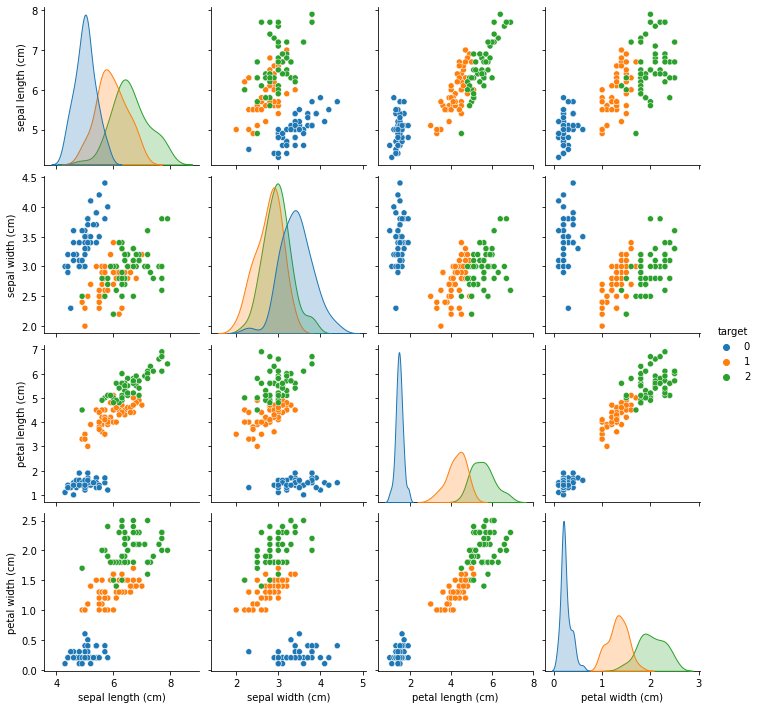

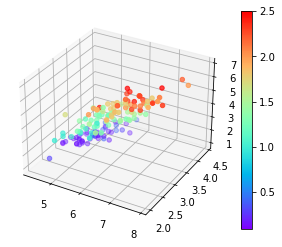

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="target", palette="tab10")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[:, 0]
y = features[:, 1]
z = features[:, 2]
c = features[:, 3]

img = ax.scatter(x, y, z, c=c, cmap=plt.cm.rainbow)
fig.colorbar(img)
plt.show()

## Nearest Neighbor

#### Euclidean Distance

In [5]:
import datetime

seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))

max_k = 15

train_acc = []
test_acc = []

for k in range(max_k):
    start = time.perf_counter()
    knn = KNeighborsClassifier(k+1, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    train_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)

    train_acc.append(train_score)
    test_acc.append(test_score)
    
    print("K is : ", k+1)
    print("Training set score: %f" % train_score)
    print("Test set score: %f" % test_score)
    print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

train size :  105  / test size :  45
K is :  1
Training set score: 1.000000
Test set score: 0.977778
Training Time : 0.2252 sec
K is :  2
Training set score: 1.000000
Test set score: 0.977778
Training Time : 0.2169 sec
K is :  3
Training set score: 1.000000
Test set score: 0.977778
Training Time : 0.2382 sec
K is :  4
Training set score: 1.000000
Test set score: 0.977778
Training Time : 0.2180 sec
K is :  5
Training set score: 1.000000
Test set score: 0.977778
Training Time : 0.2162 sec
K is :  6
Training set score: 1.000000
Test set score: 0.977778
Training Time : 0.2193 sec
K is :  7
Training set score: 1.000000
Test set score: 0.977778
Training Time : 0.2181 sec
K is :  8
Training set score: 1.000000
Test set score: 0.977778
Training Time : 0.2177 sec
K is :  9
Training set score: 1.000000
Test set score: 0.977778
Training Time : 0.2153 sec
K is :  10
Training set score: 1.000000
Test set score: 0.977778
Training Time : 0.2185 sec
K is :  11
Training set score: 1.000000
Test set sco

Experiments

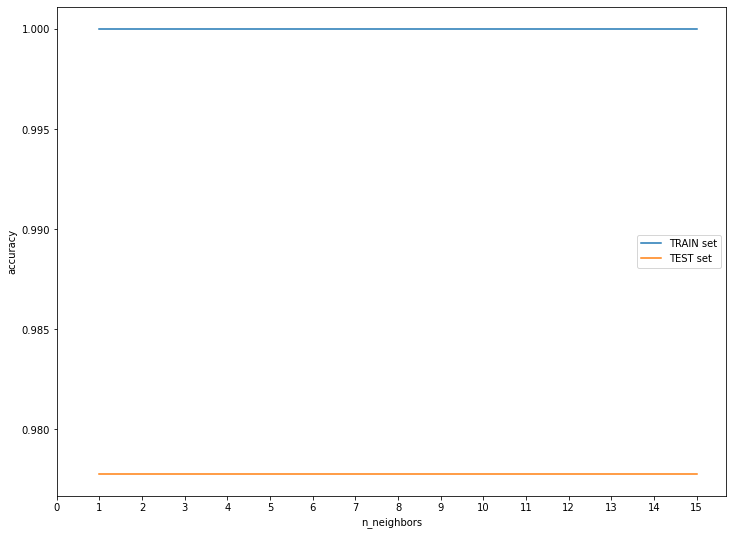

In [6]:
plt.figure(figsize=(12, 9))
plt.plot(range(1, 16), train_acc, label='TRAIN set')
plt.plot(range(1, 16), test_acc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()

Analysis

In [7]:
error_idx = []

for idx, data in enumerate(x_test):
    data = data.reshape(1, -1)
    predict = knn.predict(data)
    if predict != y_test[idx]:
        error_idx.append(idx)
        print(idx, " predict : ", predict, " / ", y_test[idx])

37  predict :  [2]  /  1


In [8]:
from scipy.spatial import distance

k = 10

total_boundary = []

for n, e_idx in enumerate(error_idx):
    dist_arr = []
    for idx, data in enumerate(x_train):
        data = data.reshape(1, -1)
        dist = distance.euclidean(x_test[e_idx], data)
        dist_arr.append(dist)

    boundary = np.argsort(dist_arr)[:k]
    total_boundary.append(np.array(boundary))

    print(e_idx, " Data Index")
    print(boundary)
    print("Train Data Value")
    print(x_train[boundary])
    print("Train Data Label")
    print(y_train[boundary])
    print("Error Data Value")
    print(x_test[e_idx])
    print("------------------------------------------")

37  Data Index
[10 92 17 31  9 87 74 12  3 25]
Train Data Value
[[6.3 2.8 5.1 1.5]
 [5.8 2.7 5.1 1.9]
 [5.8 2.7 5.1 1.9]
 [5.9 3.  5.1 1.8]
 [6.3 2.7 4.9 1.8]
 [6.3 2.5 4.9 1.5]
 [6.  3.  4.8 1.8]
 [6.3 2.5 5.  1.9]
 [6.  2.2 5.  1.5]
 [6.4 2.7 5.3 1.9]]
Train Data Label
[2 2 2 2 2 1 2 2 2 2]
Error Data Value
[6.  2.7 5.1 1.6]
------------------------------------------


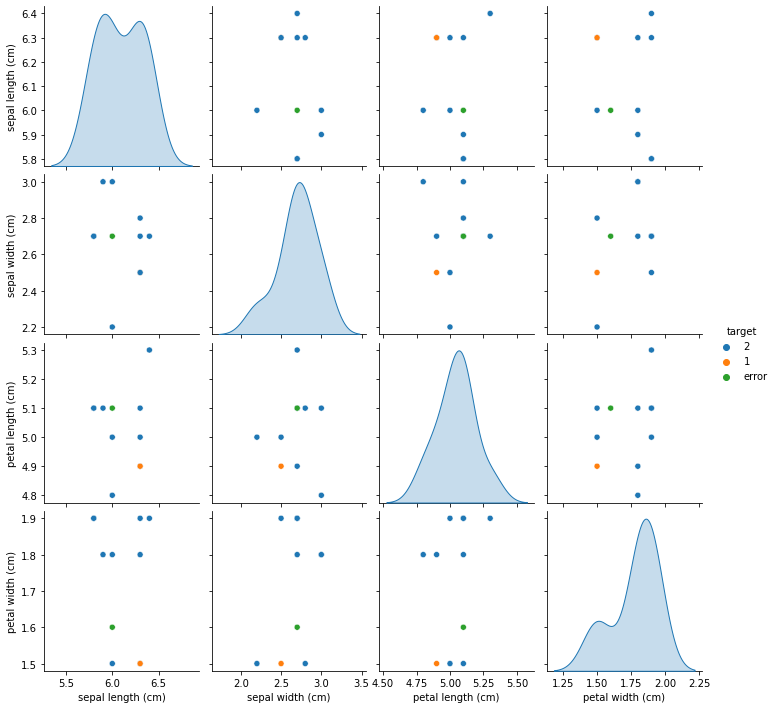

In [9]:

for n in range(len(total_boundary)):
    features = x_train[total_boundary[n]]
    features = np.append(features, x_test[error_idx[n]].reshape(1, -1), axis=0)

    target = y_train[total_boundary[n]]
    target = np.append(target, "error")

    df_feature = pd.DataFrame(features, columns=feature_names)
    df_target = pd.DataFrame(target, columns=["target"])

    df = pd.concat([df_feature, df_target], axis=1)

    sns.pairplot(df, hue="target", palette="tab10")
    plt.show()

#### Uniform Distance

In [10]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=seed, shuffle=True)

max_k = 15

train_acc = []
test_acc = []

for k in range(max_k):
    knn = KNeighborsClassifier(k+1, n_jobs=-1)
    knn.fit(x_train, y_train)

    train_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)

    train_acc.append(train_score)
    test_acc.append(test_score)
    
    print("K is : ", k+1)
    print("Training set score: %f" % train_score)
    print("Test set score: %f" % test_score)

K is :  1
Training set score: 1.000000
Test set score: 1.000000
K is :  2
Training set score: 0.625000
Test set score: 0.666667
K is :  3
Training set score: 0.375000
Test set score: 1.000000
K is :  4
Training set score: 0.750000
Test set score: 1.000000
K is :  5
Training set score: 0.750000
Test set score: 1.000000
K is :  6
Training set score: 0.750000
Test set score: 1.000000
K is :  7
Training set score: 0.750000
Test set score: 1.000000
K is :  8
Training set score: 0.750000
Test set score: 1.000000


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 8, n_neighbors = 9

Experiments

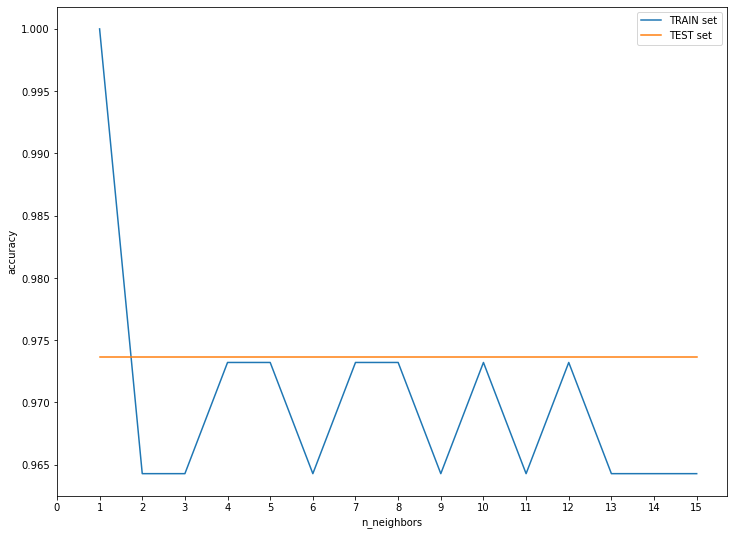

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(range(1, 16), train_acc, label='TRAIN set')
plt.plot(range(1, 16), test_acc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()

## Nearest Neighbor - Hard Coding